# CS 363M Machine Learning Project

## Authors
- Hudson Gould (HAG929)
- Cristian Cantu (cjc5844)
- Diego Costa (dc48222)
- Dylan Dang (dad4364)

## Background
In this project, we are using data from the UT Baseball 2024 Season. Our dataset contains data from every single pitch during UT home games, taken from a TrackMan brand detection machine which tracks and records 3D characteristic of a baseball in motion.

We want to use this data to predict whether a given pitch will be a home run or not. We will use information such as the pitch velocities to predict this.

## Data Preparation

### Import packages

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import seaborn as sns
%matplotlib inline

### Data Cleaning

#### Print head of the data

In [35]:
data = pd.read_csv('data_10k.csv')


# target and core features
columns_to_keep = [
    
    'PlayResult',  
    'RunsScored',          
    'RelSpeed',            
    'SpinRate',            
    'SpinAxis',            
    'ExitSpeed',           
    'Angle',               
    'Distance',            
    'hit_hang_time',           
    'VertBreak',          
    'InducedVertBreak',    
    'HorzBreak',           
    'PlateLocHeight',      
    'PlateLocSide',        
    'Direction',           

    'hit_max_height',           
       
    'SpeedDrop',           
    'position_110x', 'position_110y', 'position_110z', 
    'hit_spin_axis',         
    'x0', 'y0', 'z0',  
    'vx0', 'vy0', 'vz0',  
    'ax0', 'ay0', 'az0'   
]

data = data[columns_to_keep]

data.head()

,PlayResult,RunsScored,RelSpeed,SpinRate,SpinAxis,ExitSpeed,Angle,Distance,hit_hang_time,VertBreak,...,hit_spin_axis,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
0,Undefined,0,73.64,2557.01,76.94,NaN,NaN,NaN,NaN,-58.59,...,NaN,-2.00,50.0,5.41,3.28,-106.58,0.58,12.91,22.07,-34.04
1,Strikeout,0,81.57,2167.91,112.31,NaN,NaN,NaN,NaN,-38.74,...,NaN,-1.87,50.0,6.01,5.23,-118.11,-3.37,3.74,26.71,-27.88
2,Undefined,0,84.45,2150.30,192.59,NaN,NaN,NaN,NaN,-19.68,...,NaN,-2.41,50.0,5.52,3.08,-122.94,-1.77,-3.68,24.28,-16.89
3,Undefined,0,81.24,1484.51,260.46,NaN,NaN,NaN,NaN,-39.75,...,NaN,-1.17,50.0,6.23,0.38,-117.74,-0.37,-12.27,24.59,-28.63
4,Undefined,0,91.84,2421.61,205.21,NaN,NaN,NaN,NaN,-17.91,...,NaN,-1.23,50.0,5.18,9.62,-132.57,-10.20,-8.59,32.05,-14.93


### Data Exploration

In [38]:
cols = data.select_dtypes(include=['object', 'category']).columns
#cols = cols.drop(['game_id', 'Pitcher', 'PitcherTeam', 'Batter', 'BatterTeam', 'catcher', 'catcher_team'])

max_col_width = max(len(col) for col in cols)

for col in cols:
    print(f'{col:<{max_col_width}}: {data[col].unique()}')

PlayResult: ['Undefined' 'Strikeout' 'Single' 'FieldersChoice' 'Out' 'Double' 'Walk'
 'Sacrifice' 'HomeRun' 'Error' 'Triple' 'StolenBase' 'CaughtStealing']


In [43]:
# print number of missing values in each column
missing = data.isnull().sum()
print(missing[missing > 0])

TaggedPitchType                30
RelSpeed                       48
SpinRate                       58
SpinAxis                       48
Tilt                           48
InducedVertBreak               48
VertBreak                      48
HorzBreak                      48
VertApprAngle                  48
HorzApprAngle                  48
vert_rel_angle                 48
horz_rel_angle                 48
RelHeight                      48
RelSide                        48
Extension                      52
PlateLocHeight                 48
PlateLocSide                   48
zone_time                      48
EffectiveVelo                  48
SpeedDrop                      48
TaggedHitType                7507
hit_x                        8219
hit_y                        8219
ExitSpeed                    7507
Angle                        7507
HitSpinRate                  8146
hit_spin_axis                8306
Distance                     8219
hit_last_tracked_distance    7507
hit_hang_time 

In [47]:
print(data['PlayResult'].value_counts())

PlayResult
Undefined         7495
Out                835
Strikeout          575
Single             388
Walk               323
Double             118
HomeRun             66
Sacrifice           54
FieldersChoice      47
Error               46
StolenBase          28
CaughtStealing      13
Triple              11
Name: count, dtype: int64


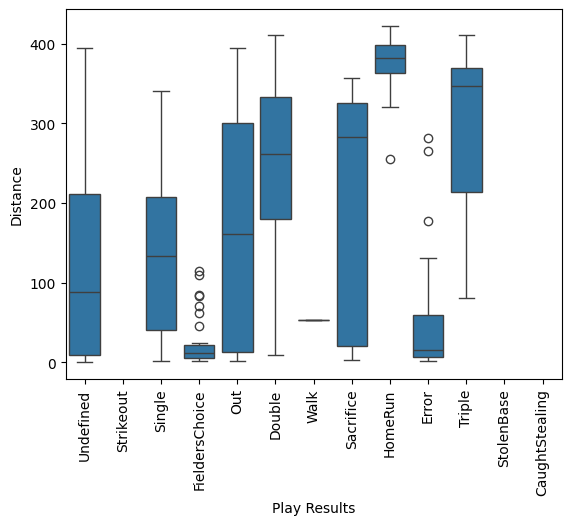

In [50]:
plt.figure()
sns.boxplot(x='PlayResult', y='Distance', data=data)
plt.xlabel('Play Results')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

In [52]:
data = pd.read_csv('data_10k.csv')

# Trying to plot a heatmap of correlations between all the features and PlayResult = Homerun
import pandas as pd

# Ensure IsHomeRun is defined as a binary column
data['IsHomeRun'] = (data['PlayResult'] == 'HomeRun').astype(int)

# Select numerical columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations with IsHomeRun
home_run_corr = data[numerical_features].corr()['IsHomeRun'].sort_values(ascending=False)

# Display the correlations
pd.set_option('display.max_rows', None)
print(home_run_corr)

IsHomeRun                    1.000000
RunsScored                   0.526636
hit_last_tracked_distance    0.337569
Distance                     0.327059
hit_y                        0.315036
hit_hang_time                0.246433
ExitSpeed                    0.198423
hit_max_height               0.153468
position_110x                0.070841
hit_contact_x                0.068017
Angle                        0.042155
position_110y                0.039385
PitchofPA                    0.037337
Balls                        0.028325
Strikes                      0.025754
PitcherId                    0.016385
HorzBreak                    0.015899
catcher_id                   0.014210
Extension                    0.013043
InducedVertBreak             0.012919
pfxz                         0.012479
VertApprAngle                0.012105
az0                          0.010826
VertBreak                    0.010763
SpinAxis                     0.009017
PAofInning                   0.008517
HorzApprAngl

Missing values per feature:
Time                            0
PitchNo                         0
Inning                          0
PAofInning                      0
PitchofPA                       0
PitcherId                       0
BatterId                        0
OutsOnPlay                      0
Balls                           0
Strikes                         0
Outs                            0
RelSpeed                       48
SpinRate                       58
SpinAxis                       48
Tilt                           48
InducedVertBreak               48
VertBreak                      48
HorzBreak                      48
VertApprAngle                  48
HorzApprAngle                  48
vert_rel_angle                 48
horz_rel_angle                 48
RelHeight                      48
RelSide                        48
Extension                      52
PlateLocHeight                 48
PlateLocSide                   48
zone_time                      48
EffectiveVelo       

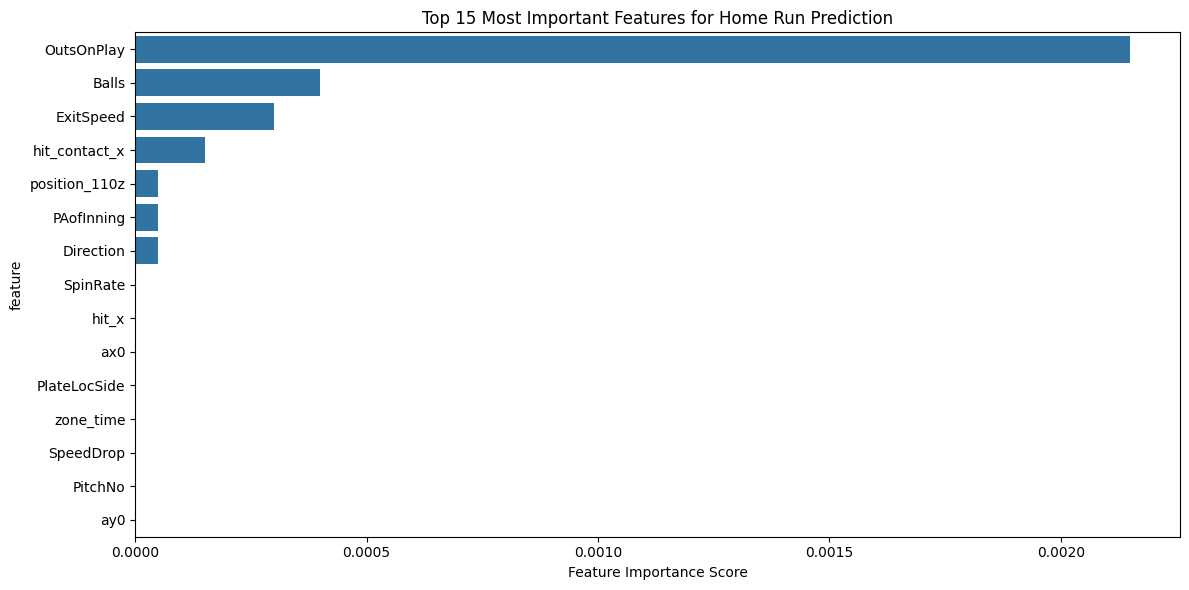

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary target variable for home runs
data['IsHomeRun'] = (data['PlayResult'] == 'HomeRun').astype(int)

# Select features for the model
# Remove non-numeric columns and the target variables
features = data.select_dtypes(include=['float64', 'int64']).columns
features = features.drop(['IsHomeRun', 'RunsScored'])  # Remove target variables

X = data[features]
y = data['IsHomeRun']

# Print the number of missing values for each feature
print("Missing values per feature:")
print(X.isnull().sum())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and apply imputer for missing values
# Using mean strategy - you can also use 'median' or 'most_frequent' if more appropriate
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train SVM model
print("Training SVM model...")
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate feature importance using permutation importance
from sklearn.inspection import permutation_importance
result = permutation_importance(svm, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': result.importances_mean,
    'std': result.importances_std
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features for Home Run Prediction')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

# Function to predict home run probability
def predict_homerun_probability(exit_speed, launch_angle, distance):
    # Create a sample input with the mean values for all features
    sample = pd.DataFrame([X_train.mean()], columns=X_train.columns)
    
    # Update the specific features we're interested in
    sample['ExitSpeed'] = exit_speed
    sample['Angle'] = launch_angle
    sample['Distance'] = distance
    
    # Apply the same imputation and scaling
    sample_imputed = imputer.transform(sample)
    sample_scaled = scaler.transform(sample_imputed)
    
    # Get probability
    probability = svm.predict_proba(sample_scaled)[0][1]
    return probability

### Feature Engineering

## Modeling

### Decision Trees (Cristian)

### Neural Nets (Hudson)

### SVM

## Outcome